# Classification and KNN

**OBJECTIVES**

- Practice using KNN and Logistic Regression
- Interpret results
- Train/Test Split
- Pipelines
- Grid Searches
- Feature Selection

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
###load the data -- this is a bunch
cancer = load_breast_cancer()

In [42]:
X = cancer.data

In [43]:
y = cancer.target

In [44]:
cdf = pd.DataFrame(X, columns = cancer.feature_names)
cdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
cdf['target'] = cancer.target

In [46]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [47]:
cdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

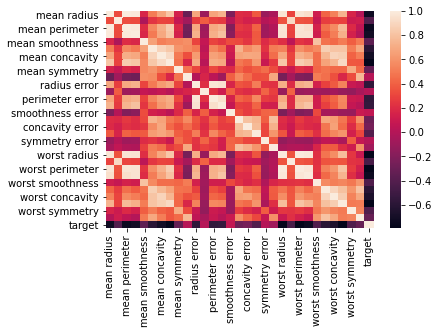

In [48]:
sns.heatmap(cdf.corr())

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


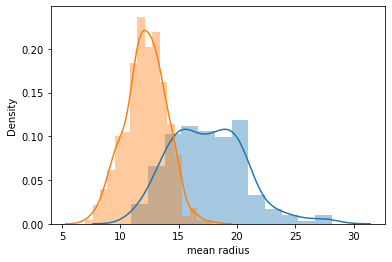

In [49]:
sns.distplot(cdf[cdf['target'] == 0]['mean radius'])
sns.distplot(cdf[cdf['target'] == 1]['mean radius']);

Text(0, 0.5, 'mean concavity')

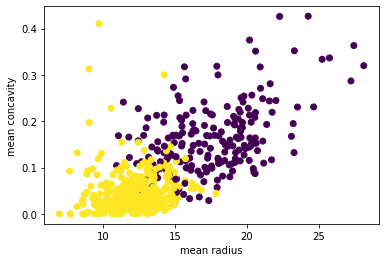

In [50]:
plt.scatter(cdf['mean radius'], cdf['mean concavity'], c = cdf['target'])
plt.xlabel('mean radius')
plt.ylabel('mean concavity')

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


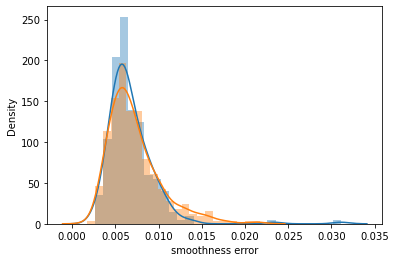

In [51]:
sns.distplot(cdf[cdf['target'] == 0]['smoothness error'])
sns.distplot(cdf[cdf['target'] == 1]['smoothness error']);

In [52]:
X = cdf[['mean radius', 'mean concavity']]
y = cdf.target

### Build a model(s)

In [53]:
knn = KNeighborsClassifier()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knn.score(X_train, y_train)

0.9178403755868545

In [57]:
knn.score(X_test, y_test)

0.9020979020979021

In [58]:
cdf.target.value_counts(normalize = True)

1    0.627417
0    0.372583
Name: target, dtype: float64

### Make sure to scale!

| model | scale |
| ----- | ----- |
| linear regression | never |
| logistic regression | yes --> if using sklearn |
| knn | yes (always!) |

In [59]:
sscaler = StandardScaler()

In [60]:
X_train_scaled = sscaler.fit_transform(X_train)

In [61]:
X_test_scaled = sscaler.transform(X_test)

In [62]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [63]:
knn.score(X_train_scaled, y_train)

0.9295774647887324

In [64]:
knn.score(X_test_scaled, y_test)

0.9300699300699301

### Combine scaling and modeling in a pipeline

In [65]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [66]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [67]:
pipe.score(X_train, y_train)

0.9295774647887324

In [68]:
pipe.score(X_test, y_test)

0.9300699300699301

In [69]:
class JacobStandardScale:
    def __init__(self):
        self.mean = None
        self.std = None
        
    def fit(self, X):
        self.mean = np.mean(X)
        self.std = np.std(X)
        
    def transform(self, X):
        return (X - self.mean)/self.std
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
        

In [70]:
jscale = JacobStandardScale()

In [71]:
jscale.mean

In [72]:
jscale.std

In [73]:
jscale.fit(X_train)

In [74]:
jscale.mean

mean radius       14.108617
mean concavity     0.089001
dtype: float64

In [75]:
jscale.std

mean radius       3.520074
mean concavity    0.078570
dtype: float64

In [ ]:
jscale.transform(X_test)

### How many neighbors? (why 5)

In [76]:
scores = []
neighbors = []
for neighbor in [2, 3, 4, 5, 6, 7, 8, 9]:
    pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=neighbor))
    pipe.fit(X_train, y_train)
    scores.append(pipe.score(X_test, y_test))
    neighbors.append(neighbor)

In [78]:
pd.DataFrame({'scores': scores, 'neighbors': neighbors}).nlargest(1, 'scores')

,scores,neighbors
5,0.937063,7


In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [139]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [140]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [141]:
params = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

In [142]:
grid = GridSearchCV(pipe, param_grid=params, scoring = 'precision')

In [143]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11,
                                                               13, 15]},
             scoring='precision')

In [144]:
grid.best_params_

{'kneighborsclassifier__n_neighbors': 13}

In [145]:
grid.score(X_train, y_train)

0.9194139194139194

In [146]:
grid.score(X_test, y_test)

0.9340659340659341

### Look at Logistic Regression

In [147]:
lgr_pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [148]:
lgr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [149]:
lgr_pipe.score(X_train, y_train)

0.9107981220657277

In [150]:
lgr_pipe.score(X_test, y_test)

0.9090909090909091

In [151]:
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

In [152]:
lgr_grid = GridSearchCV(lgr_pipe, param_grid=params, scoring = 'precision')

In [153]:
lgr_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                   100.0, 1000.0]},
             scoring='precision')

In [154]:
lgr_grid.best_params_

{'logisticregression__C': 10.0}

In [155]:
lgr_grid.score(X_train, y_train)

0.9142857142857143

In [156]:
lgr_grid.score(X_test, y_test)

0.8947368421052632

### What we were interested in -- error!

In [157]:
from sklearn.metrics import plot_confusion_matrix

Text(0.5, 1.0, 'Logistic Grid')

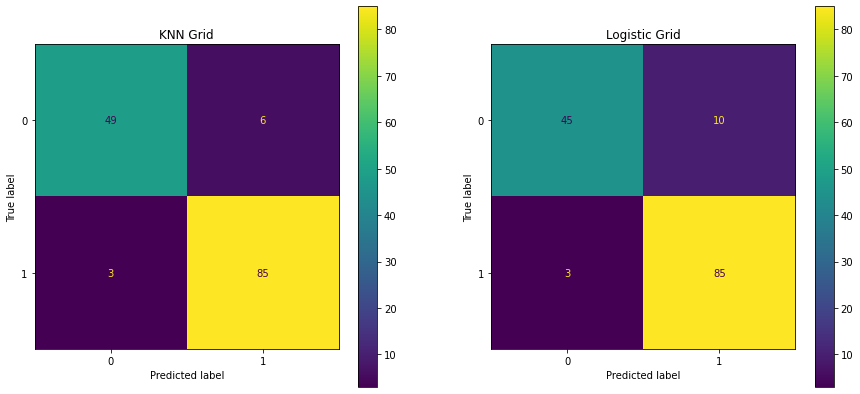

In [158]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plot_confusion_matrix(grid, X_test, y_test, ax = ax[0])
ax[0].set_title('KNN Grid')
plot_confusion_matrix(lgr_grid, X_test, y_test, ax = ax[1])
ax[1].set_title("Logistic Grid")

In [159]:
import sklearn

In [160]:
knn_best_pipe = grid.best_estimator_

In [162]:
knn_best_pipe.named_steps['kneighborsclassifier'].predict_proba(X_test)[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [164]:
cancerous_probabilities = lgr_grid.best_estimator_.named_steps['logisticregression'].predict_proba(X_test)[:, 0]

In [168]:
np.where(cancerous_probabilities > .9, 0, 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [113]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])